In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import string
import re

In [2]:
base_dir = '/kaggle/input/flickr8kimagescaptions/flickr8k'
working_dir = '/kaggle/working/'

# Extracting Image features using Inception Model

In [3]:
# importing model 
import tensorflow
from tensorflow import keras 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

2024-07-09 17:47:36.170868: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 17:47:36.170962: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 17:47:36.303055: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
# Defining model 
model_img =InceptionV3()
model_img = Model(inputs=model_img.inputs,outputs=model_img.layers[-2].output)

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [73]:
model_img.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [6]:
from tqdm.notebook import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [7]:
## loading images 
features={}
directory = os.path.join(base_dir,'images') 

for img in tqdm(os.listdir(directory)):
    img_path = directory+'/'+img
    image = load_img(img_path,target_size=(299,299))
    image = img_to_array(image)
    image = np.expand_dims(image, axis = 0)
    image = preprocess_input(image)
    feature = model_img.predict(image,verbose=0)
    image_id=img.split('.')[0]
    features[image_id]=feature
    

  0%|          | 0/8091 [00:00<?, ?it/s]

I0000 00:00:1720547282.798801      98 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [62]:
features['3226254560_2f8ac147ea'][0]

array([0.23555516, 0.28298867, 0.42571765, ..., 0.46947825, 0.28000188,
       0.2839393 ], dtype=float32)

In [20]:
## saving features
import pickle
pickle.dump(features, open(os.path.join(working_dir, 'features.pkl'), 'wb'))

# loading text file 

In [12]:
directory = os.path.join(base_dir,'captions.txt')
with open(directory,'r') as f:
    text = f.read()

In [17]:
# cleaning the last column which is null
text =text.split('\n')[:-1]

In [19]:
text[-5:]

['997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face',
 '997722733_0cb5439472.jpg,A man is rock climbing high in the air .',
 '997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock face covered in assist handles .',
 '997722733_0cb5439472.jpg,A rock climber in a red shirt .',
 '997722733_0cb5439472.jpg,A rock climber practices on a rock climbing wall .']

In [25]:
# mapping image name with captions
mapping ={}
for line in tqdm(text):
    token = line.split(',')
    if len(line)<2:
        continue
    img_id,caption = token[0],token[1:]
    img_id = img_id.split('.')[0]
    caption = " ".join(caption)
    if img_id not in mapping:
        mapping[img_id] =[]
    mapping[img_id].append(caption)
    

  0%|          | 0/40456 [00:00<?, ?it/s]

In [29]:
mapping.pop('image')

['caption']

In [31]:
len(mapping)

8091

In [34]:
mapping['997722733_0cb5439472']

['A man in a pink shirt climbs a rock face',
 'A man is rock climbing high in the air .',
 'A person in a red shirt climbing up a rock face covered in assist handles .',
 'A rock climber in a red shirt .',
 'A rock climber practices on a rock climbing wall .']

In [35]:
# Cleaning the text
def clean(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = re.sub('”', '', text)
    text = re.sub('“', '', text)
    text = text.lower()
    text = re.sub(' +', ' ', text)
    text = text.strip()
    text = 'sos '+text+' eos'
    return text

In [40]:
for key,value in mapping.items():
    for i in range(len(value)):
        cap = value[i]
        cap = clean(cap)
        value[i]=cap

In [45]:
mapping['997722733_0cb5439472']

['sos a man in a pink shirt climbs a rock face eos',
 'sos a man is rock climbing high in the air eos',
 'sos a person in a red shirt climbing up a rock face covered in assist handles eos',
 'sos a rock climber in a red shirt eos',
 'sos a rock climber practices on a rock climbing wall eos']

In [46]:
captions = []
for key in mapping:
    for caption in mapping[key]:
        captions.append(caption)

In [48]:
len(captions)

40455

In [49]:
captions[-10:]

['sos a person stands near golden walls eos',
 'sos a woman behind a scrolled wall is writing eos',
 'sos a woman standing near a decorated wall writes eos',
 'sos the walls are covered in gold and patterns eos',
 'sos woman writing on a pad in room with gold decorated walls eos',
 'sos a man in a pink shirt climbs a rock face eos',
 'sos a man is rock climbing high in the air eos',
 'sos a person in a red shirt climbing up a rock face covered in assist handles eos',
 'sos a rock climber in a red shirt eos',
 'sos a rock climber practices on a rock climbing wall eos']

# Tokenizing text

In [63]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [52]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions)
vocab_size = len(tokenizer.word_index) + 1

In [55]:
vocab_size

8831

In [56]:
max_length = max(len(caption.split()) for caption in captions)
max_length

38

# Create Generator 

In [64]:
from tensorflow.keras.utils import to_categorical, plot_model

In [94]:
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            for caption in captions:
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length,padding='post')[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield {"image": X1, "text": X2}, y
                X1, X2, y = list(), list(), list()
                n = 0

# Model Building

In [95]:
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

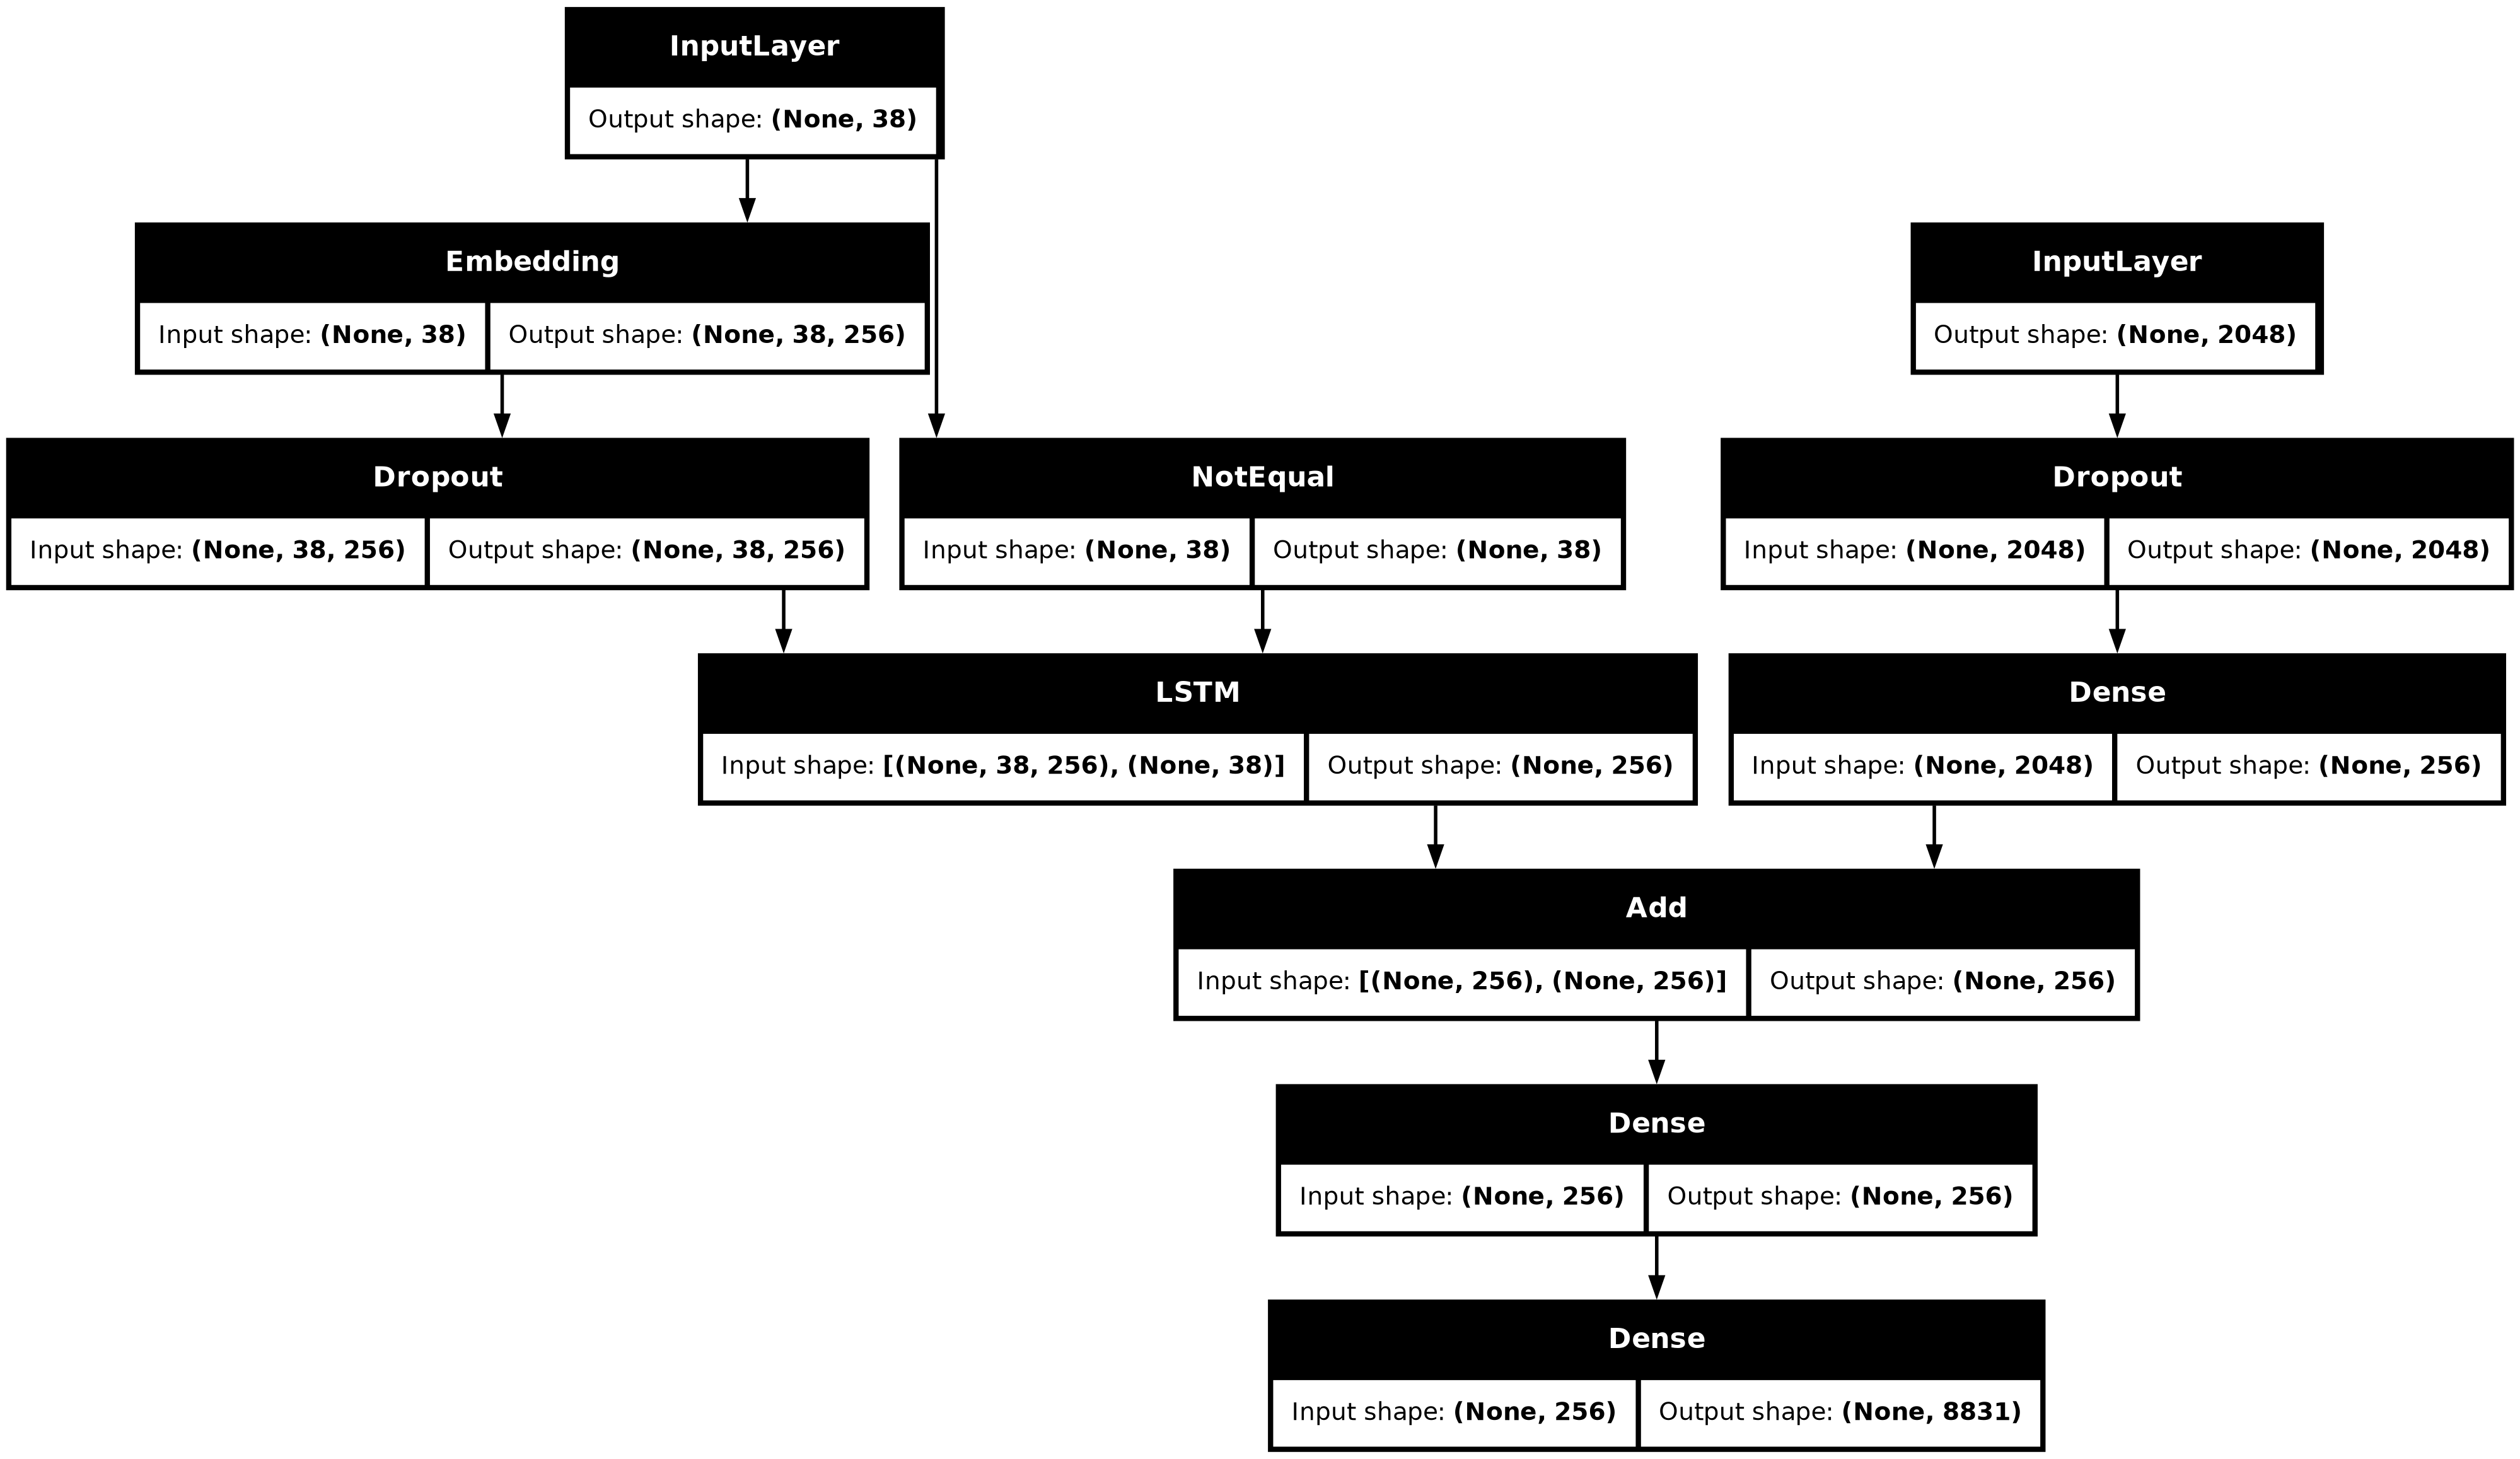

In [100]:
# model
inputs1 = Input(shape=(2048,), name="image")
fe1 = Dropout(0.2)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape=(max_length,), name="text")
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.2)(se1)
se3 = LSTM(256)(se2)

decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model2 = Model(inputs=[inputs1, inputs2], outputs=outputs)
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
plot_model(model2, show_shapes=True)

In [102]:
model2.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text (InputLayer)   │ (None, 38)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image (InputLayer)  │ (None, 2048)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_6         │ (None, 38, 256)   │  2,260,736 │ text[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 2048)      │          0 │ image[0][0]       │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 38, 256)   │          0 │ embedding_6[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_6         │ (None, 38)        │          0 │ text[0][0]        │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 256)       │    524,544 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ (None, 256)       │    525,312 │ dropout_13[0][0], │
│                     │                   │            │ not_equal_6[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 256)       │          0 │ dense_18[0][0],   │
│                     │                   │            │ lstm_6[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 256)       │     65,792 │ add_6[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 8831)      │  2,269,567 │ dense_19[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,645,951 (21.54 MB)

 Trainable params: 5,645,951 (21.54 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
train_data=list(mapping.keys())

In [105]:
epochs = 20
batch_size = 32
steps = len(train_data) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train_data, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model2.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

252/252 ━━━━━━━━━━━━━━━━━━━━ 73s 281ms/step - accuracy: 0.1825 - loss: 5.4222
252/252 ━━━━━━━━━━━━━━━━━━━━ 71s 283ms/step - accuracy: 0.3375 - loss: 3.5403
252/252 ━━━━━━━━━━━━━━━━━━━━ 72s 285ms/step - accuracy: 0.3692 - loss: 3.1389
252/252 ━━━━━━━━━━━━━━━━━━━━ 71s 282ms/step - accuracy: 0.3865 - loss: 2.9120
252/252 ━━━━━━━━━━━━━━━━━━━━ 71s 283ms/step - accuracy: 0.3991 - loss: 2.7533
252/252 ━━━━━━━━━━━━━━━━━━━━ 72s 285ms/step - accuracy: 0.4100 - loss: 2.6290
252/252 ━━━━━━━━━━━━━━━━━━━━ 71s 284ms/step - accuracy: 0.4216 - loss: 2.5283
252/252 ━━━━━━━━━━━━━━━━━━━━ 71s 284ms/step - accuracy: 0.4321 - loss: 2.4393
252/252 ━━━━━━━━━━━━━━━━━━━━ 72s 284ms/step - accuracy: 0.4411 - loss: 2.3632
252/252 ━━━━━━━━━━━━━━━━━━━━ 72s 285ms/step - accuracy: 0.4502 - loss: 2.2975
252/252 ━━━━━━━━━━━━━━━━━━━━ 71s 283ms/step - accuracy: 0.4592 - loss: 2.2374
252/252 ━━━━━━━━━━━━━━━━━━━━ 71s 283ms/step - accuracy: 0.4677 - loss: 2.1839
252/252 ━━━━━━━━━━━━━━━━━━━━ 72s 284ms/step - accuracy: 0.4743 -

# Inference model for prediction

In [106]:
def to_word(i, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == i:
            return word
    return None

In [115]:
def predict_caption(model, image, tokenizer, max_length):
    
    in_text = 'sos'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length,padding='post')
        yhat = model.predict([image, sequence])
        
        yhat = np.argmax(yhat)
        word = to_word(yhat, tokenizer)
        if word is None:
            break
        in_text += " " + word
        if word == 'eos':
            break
      
    return in_text

In [110]:
weight=model2.get_weights()
import pickle
pickle.dump(weight, open(os.path.join(working_dir, 'weight.pkl'), 'wb'))

In [111]:
model2.save('model_caption.h5')

In [112]:
inception_model = InceptionV3()
# restructure the model
vgg_model = Model(inputs=inception_model.inputs, outputs=inception_model.layers[-2].output)

In [116]:
image_path = '/kaggle/input/flickr8kimagescaptions/flickr8k/images/1009434119_febe49276a.jpg'
# load image
image = load_img(image_path, target_size=(299, 299))
# convert image pixels to numpy array
image = img_to_array(image)
# reshape data for model
image = np.expand_dims(image, axis = 0)
# preprocess image for vgg
image = preprocess_input(image)
# extract features
feature = vgg_model.predict(image, verbose=0)
# predict from the trained model
predict_caption(model, feature, tokenizer, max_length)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


'sos a black and white dog is playing with a red ball eos'